# SWU Machine Learning based Data Analysis Midterm Project
## Seoyeon Oh

#### 0. 문제정의 (Problem Define)
#### 1. 라이브러리 불러오기 (Libraries Setting)
#### 2. 데이터 수집하기 (Data Collection)
#### 3. 데이터 탐색하기 (Data Exploration)
- 3-1. 데이터셋 기본 정보 파악
- 3-2. 종속 변수 (목표 변수) 탐색
- 3-3. 설명 변수 (독립변수/특징변수/속성)탐색    
- 3-4. 변수들 간의 관계 탐색

        
#### 4. 모델링 하기 (Modeling)
- 4-1. 데이터 전처리
- 4-2. 회귀 모델링    
- 4-3. 모델 해석
- 4-4. 모델 예측 결과 및 성능 평가

## [0]: 문제정의 (Problem Define)


1. **_Kaggle의 Animal Crossing New Horizons Catalog 데이터_** (https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset)
2. 동물의 숲 게임 전반을 하나의 백과사전처럼 모아둔 **_수풀잎 모여봐요 동물의 숲 백과사전 페이지_** (https://animalcrossing.soopoolleaf.com/ko/acnh/)
3. **_이상형 월드컵 PiKu 사이트의 모여봐요 동물의 숲 주민 월드컵_** (https://www.piku.co.kr/w/rank/4mdZae)
4. 동영상 공유 플랫폼 **_유튜브 YouTube 페이지_** (https://www.youtube.com/)  


네 곳에서 데이터를 활용해 모여봐요 동물의 숲 주민의 인기도를 예측하는 선형 회귀 모델을 만들어 봅니다.  
  
머신러닝 모델링 중 회귀모델링을 통해, 주민의 인기도에 영향을 주는 요소를 파악하고, 인기도를 예측해 봅니다.

### y = f(x)
- y: 동물의 숲 주민의 인기도
- x: 인기도에 영향을 주는 요소들 (Data Set에서 columns)
- f: 회귀모델링(Regression)

## [1]: 라이브러리 불러오기 (Libraries Setting)

In [68]:
### 사용할 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

### [2]: 데이터 수집하기 (Data Collection)
#### [2.1]: 사용할 데이터 셋을 가져옵니다: ACNH collections 
* 크롤링하고, 새로운 칼럼들도 만든 모든 데이터가 병합된 데이터를 가져와 줍니다.
* Scaling은 별도로 진행하지 않은 데이터입니다.

In [69]:
df = pd.read_csv("../prep_data_files/ACNH_for_regression.csv")

In [70]:
pd.options.display.max_columns = None   # columns를 모두 display 해줘라!

In [71]:
df = df.iloc[:, 1:]  # index column 제거

In [72]:
# 데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 살펴봅니다.
df.head(3)

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 1,Style 2,Sociability,Conversation Type,순위,승률,Exist,Mention Count,Viral
0,Admiral,일섭,201,0.2101,Bird,Male,Cranky,Nature,Cool,Cool,2,A,195.0,0.4138,1,7.0,156.519426
1,Agent S,2호,151,0.1548,Squirrel,Female,Peppy,Fitness,Active,Simple,3,B,87.0,0.5954,1,32.0,217.129316
2,Agnes,아그네스,181,0.1961,Pig,Female,Big Sister,Play,Simple,Elegant,3,A,237.0,0.2827,0,24.0,229.243190


#### [2.2]: 데이터에서 변수의 의미를 살펴봅니다:
* Features(Columns/Attributes/Xs) Descriptions

    * **Name**: 모여봐요 동물의 숲 주민 캐릭터 _영어 이름_
    * **Korean Name**: _한국어 이름_
    * **Rank**: 모여봐요 동물의 숲 수풀잎 백과사전 속 인기 순위 (독일 동물의 숲 Wiki 사이트 기반)
    * **AP**: Appear Possibility, 
        * 게임 유저가 원하는 주민을 마일 섬(게임 유저의 마을로 데리고 올 수 있는 섬)에서 만날 확률
        * _1/(동물의 종류) * 1/(해당 종류의 수)_ 의 값
    * **Species**: 모여봐요 동물의 숲 주민 캐릭터의 종
        * 'Cat', 'Rabbit', 'Frog', 'Squirrel', 'Duck', 'Dog', 'Cub', 'Pig', 'Bear', 'Mouse', 'Horse', 'Bird', 'Penguin', 'Sheep',
        - 'Elephant', 'Wolf', 'Ostrich', 'Deer', 'Eagle', 'Gorilla', 'Chicken', 'Koala', 'Goat', 'Hamster', 'Kangaroo', 'Monkey',
        - 'Anteater', 'Hippo', 'Tiger', 'Alligator', 'Lion', 'Rhino', 'Cow', 'Octopus'
    * **Gender**: Female과 Male, 여자 주민과 남자 주민
    * **Personality**: 주민의 성격
        * 'Cranky', 'Peppy', 'Big Sister', 'Lazy', 'Normal', 'Snooty', 'Jock', 'Smug'
    * **Hobby**: 주민의 취미
        * 'Nature', 'Fitness', 'Play', 'Education', 'Fashion', 'Music'
    * **Style**: 주민이 어떤 스타일인지 나타내는 데이터, 메인 스타일(_Style 1_)과 서브 스타일(_Style 2_)이 존재
        * 'Cool', 'Cute', 'Active', 'Elegant', 'Simple', 'Gorgeous'
    * **Sociability**: 주민의 사회성 (1, 2, 3 척도로 나누어 짐)
    * **Conversation Type**: A와 B로 나누어 짐
    * **순위**: 모여봐요 동물의 숲 주민 월드컵 순위 (이상형 월드컵 사이트 PiKu)
    * **승률**: 모여봐요 동물의 숲 주민 월드컵 승리 횟수 / 전체 1:1 대결 수
    * **Exist**: 동숲 시리즈 이전에 나왔던 적이 있는 캐릭터인지
    * **Mention Count**: 유튜브 영상 댓글 속 해당 주민이 몇 번 언급이 되었는지
    * **Viral**: 언급된 영상들의 바이럴 지수(조회수+좋아요 수+ 댓글수)를 로그 취한 값을 다 더한 값
    
----------------------------------------------------------------------------------------------------------------

### [3]: 데이터 탐색하기 (Data Exploration)
데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 특성을 자세히 살펴보겠습니다.

     [3-1]: 데이터셋 기본 정보 파악
     [3-2]: 종속 변수 (목표 변수) 탐색
     [3-3]: 설명 변수 (독립변수/특징변수/속성)탐색
     [3-4]: 설명변수와 종속변수 간의 관계 탐색

In [73]:
### 그래프의 배경 설정 : sns --> seaborn 라이브러리 이용
sns.set_style('darkgrid')

#### [3.1]: 데이터셋 기본 정보를 파악합니다.

In [74]:
### 데이터 셋 구조 보기
df.shape

(392, 17)

In [75]:
### [결측치] : 비어있는 데이터를 찾습니다. 
### 컬럼(변수, 특성, x)에 결측치가 있는지 확인합니다.
df.isnull().sum()

Name                 0
Korean Name          0
Rank                 0
AP                   0
Species              0
Gender               0
Personality          0
Hobby                0
Style 1              0
Style 2              0
Sociability          0
Conversation Type    0
순위                   0
승률                   0
Exist                0
Mention Count        0
Viral                0
dtype: int64

In [76]:
### [data type]을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               392 non-null    object 
 1   Korean Name        392 non-null    object 
 2   Rank               392 non-null    int64  
 3   AP                 392 non-null    float64
 4   Species            392 non-null    object 
 5   Gender             392 non-null    object 
 6   Personality        392 non-null    object 
 7   Hobby              392 non-null    object 
 8   Style 1            392 non-null    object 
 9   Style 2            392 non-null    object 
 10  Sociability        392 non-null    int64  
 11  Conversation Type  392 non-null    object 
 12  순위                 392 non-null    float64
 13  승률                 392 non-null    float64
 14  Exist              392 non-null    int64  
 15  Mention Count      392 non-null    float64
 16  Viral              392 non

In [77]:
### [통계] 숫자형 변수만 뽑아서 기본 통계를 봅니다.
df.describe()

,Rank,AP,Sociability,순위,승률,Exist,Mention Count,Viral
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,216.403061,0.241985,2.188776,195.915816,0.450869,0.693878,37.762755,251.488345
std,114.570010,0.106954,0.659440,113.485403,0.154377,0.461470,97.656150,299.246893
min,1.000000,0.127900,1.000000,1.000000,0.143900,0.000000,0.000000,0.000000
25%,119.750000,0.173000,2.000000,97.750000,0.324975,0.000000,8.000000,98.846099
50%,217.500000,0.210100,2.000000,195.500000,0.437850,1.000000,15.000000,170.287088
75%,315.250000,0.294100,3.000000,294.250000,0.568900,1.000000,29.250000,255.501926
max,410.000000,0.980400,3.000000,391.000000,0.837300,1.000000,1038.000000,2284.050603


#### [3.2]: 종속 변수(목표 변수) 탐색
종속변수(타겟변수, y)를 설정합니다.

* **순위** : PiKu 사이트의 모여봐요 동물의 숲 주민 월드컵의 랭킹 순위
* **Rank** : 수풀잎 모여봐요 동물의 숲 백과사전 인기 순위
* 주민 캐릭터의 인기 순위가 타겟변수가 됩니다.
    * 다만, 순위는 서수 데이터이기 때문에 스케일링하여 간격을 맞추어 어떤 점수로 만들어줍니다.
    * 이때 쓰이는 점수가 바로 인기도(_연속형 숫자형태_)가 됩니다.
* 이유: 저는 주민의 인기도를 맞추기 위함이기 때문입니다.
* matplot 참고 사이트: https://matplotlib.org/stable/gallery/index.html

- 아직 저 두 개의 칼럼이 같은 성격의 다른 기관에서 조사된 내용이기 때문에, 분포를 시각화 해보고, 기초통계량을 보고자 합니다.

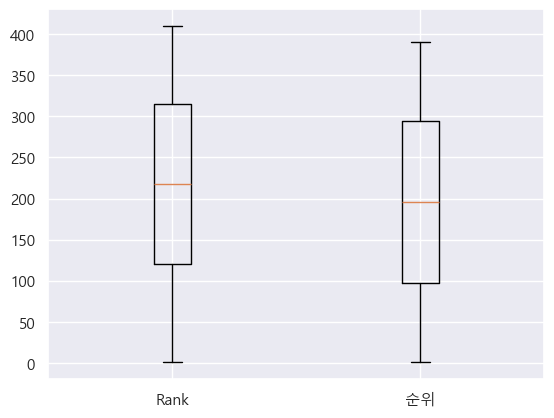

In [78]:
# 이 둘의 분포를 보기 위하여 상자그림을 그려줌.

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.boxplot(df[['Rank', '순위']], labels=['Rank', '순위'])
plt.show()

In [79]:
### [기초 통계량]: 종속변수의 기초통계량을 살펴봅니다.
df[['Rank', '순위']].describe()

,Rank,순위
count,392.000000,392.000000
mean,216.403061,195.915816
std,114.570010,113.485403
min,1.000000,1.000000
25%,119.750000,97.750000
50%,217.500000,195.500000
75%,315.250000,294.250000
max,410.000000,391.000000


- 추후에 이상형 월드컵 속 승률이라는 칼럼도 쓰이기 때문에, y값은 최종적으로 **순위**가 쓰일 예정입니다.

In [80]:
# 해당 순위는 이긴 횟수가 동일하면 순위가 같아집니다. 
# 따라서, 중복값이 발생할 수 있습니다.
# sorting해서 확인해보도록 하겠습니다.

sort_df = df.sort_values(by=['순위'], axis=0, ascending=True)
print(len(sort_df['순위'].unique()))

387


In [81]:
# '순위' 열에서 중복된 모든 값 찾기
duplicates = sort_df[sort_df['순위'].duplicated(keep=False)]

# 중복된 값과 해당 인덱스 출력
print(duplicates.loc[:, ['Korean Name', '순위']])

    Korean Name     순위
391          미첼    1.0
228          쭈니    1.0
189          메이   65.0
12          클레오   65.0
144        사브리나  218.0
173         달만이  218.0
26           루주  346.0
22         쿠스케처  346.0
167         스나일  385.0
83           츄양  385.0


<Axes: >

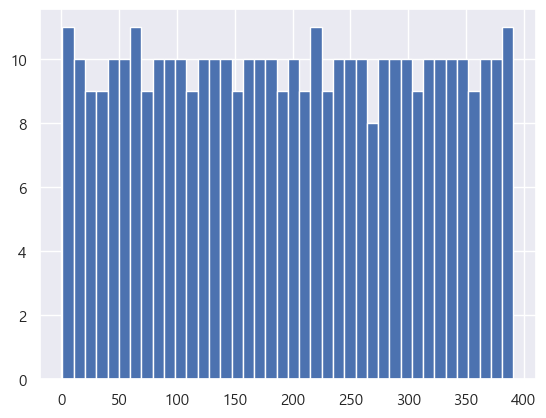

In [82]:
### 진짜 사용할 y 칼럼의 데이터 분포를 자세히 살펴보겠습니다.
df['순위'].hist(bins=40)

In [83]:
# 데이터가 고루 분포해있는 모습을 확인할 수 있습니다.

In [84]:
df['AP'].describe()

count    392.000000
mean       0.241985
std        0.106954
min        0.127900
25%        0.173000
50%        0.210100
75%        0.294100
max        0.980400
Name: AP, dtype: float64

<Axes: >

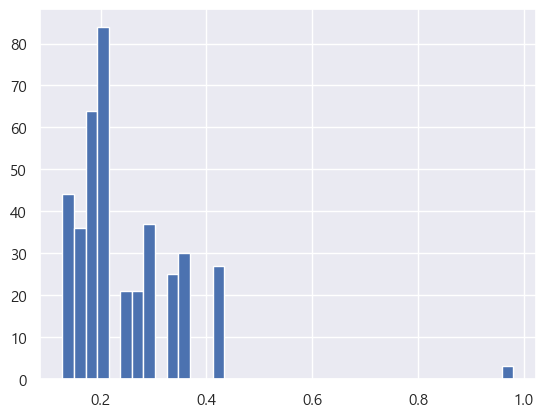

In [85]:
df['AP'].hist(bins=39)

#### [3-3]: 설명 변수 (독립변수/특징변수/속성)탐색

- 현재 설명 변수로는 Categorical한 것과, Numerical한 것이 있는데, 먼저 Categorical한 것에 대해 살펴보고자 한다.

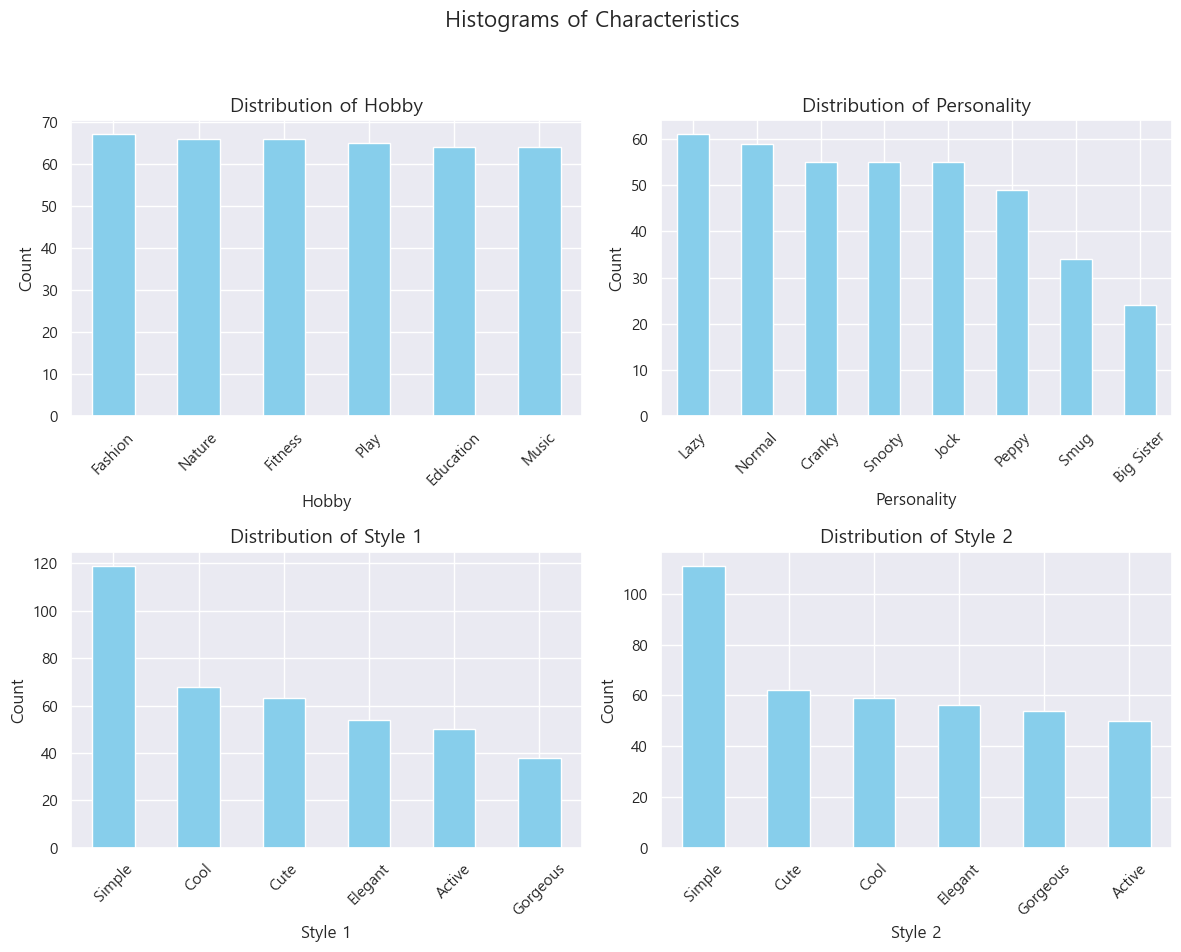

In [86]:
# Hobby, Personality, Style 1, Style 2 데이터 분포 확인
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms of Characteristics', fontsize=16)

cols_subplots = ['Hobby', 'Personality', 'Style 1', 'Style 2']
for ax, col in zip(axes.flatten(), cols_subplots):
    df[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Style의 경우, Simple을 제외하고는 모두 분포가 비슷한 양상을 띠고 있어 Style을 추후 하나의 열로 합치고 나면 one-hot encoding된 style 변수들끼리의 선형 관계를 막기 위해 Simple을 제거해 주는 것이 좋을 것 같습니다. 
- 대부분이 고른 분포를 띠고 있습니다.

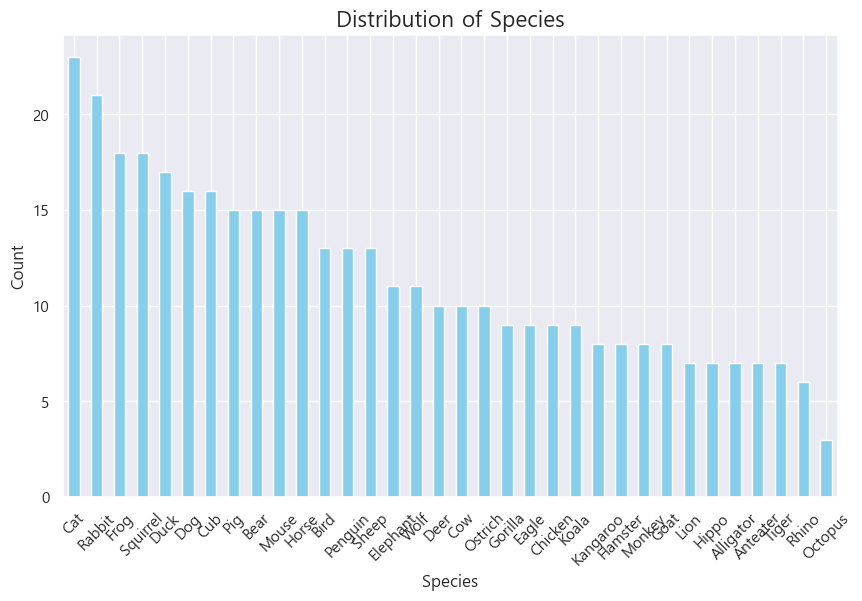

In [87]:
# 'Species'는 종류가 많아서 따로 정리! 
plt.figure(figsize=(10, 6))
df['Species'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Species', fontsize=16)
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- 이후 단계에서 할 상관관계에서는, 변수가 numerical해야 돌아가기 때문에, 미리 one-hot encoding을 진행해줍니다.
- style 칼럼부터 진행하겠습니다.

In [88]:
# Categorical한 변수는 결국 컴퓨터가 이해하기 위해서 one-hot encoding
# one-hot encoding 해준 뒤, dataframe의 열 이름 정돈을 위한 함수

# 데이터프레임의 모든 열 이름을 순회
# '_' 문자를 기준으로 문자열을 분리하고, 마지막 부분만을 새 열 이름으로 사용

def rename_columns(df):
    new_columns = {}
    for col in df.columns:
        if '_' in col:
            new_name = col.split('_')[-1]  # '_' 문자를 기준으로 분리하고 마지막 부분을 선택
            new_columns[col] = new_name
        else:
            new_columns[col] = col  # '_'가 없는 열은 그대로 유지

    df.rename(columns=new_columns, inplace=True)
    return df

In [89]:
## 현재 style 칼럼이 2개이기 때문에, 하나로 합쳐줌
# Style 1부터 One-Hot Encoding을 진행하고
style1 = pd.get_dummies(df, columns=['Style 1'], dtype=int)
style1.head(3)

rename_columns(style1)

# 'Style 2' values 기반으로 columns 값 업데이트
style_columns = ['Active', 'Cool', 'Cute', 'Elegant', 'Gorgeous', 'Simple']

# 각 행을 돌면서 그 값에 맞는 열에 맞게 값 업데이트
for index, row in style1.iterrows():
    # Update for Style 2
    style_value = row['Style 2']
    if style_value in style_columns:
        style1.at[index, style_value] += 1

In [90]:
# 가장 많은 수를 차지해 고른 분포에 약간 방해를 주던 요소인 simple을 제거
# 또한, 더미 변수들을 다 변수로 넣게 되면 추후 VIF 값이 infinite하게 나올 수 있어 최소 한 개 이상은 제거해 주어야 한다.
del style1['Simple']
style1.head()

,Name,Korean Name,Rank,AP,Species,Gender,Personality,Hobby,Style 2,Sociability,Conversation Type,순위,승률,Exist,Mention Count,Viral,Active,Cool,Cute,Elegant,Gorgeous
0,Admiral,일섭,201,0.2101,Bird,Male,Cranky,Nature,Cool,2,A,195.0,0.4138,1,7.0,156.519426,0,2,0,0,0
1,Agent S,2호,151,0.1548,Squirrel,Female,Peppy,Fitness,Simple,3,B,87.0,0.5954,1,32.0,217.129316,1,0,0,0,0
2,Agnes,아그네스,181,0.1961,Pig,Female,Big Sister,Play,Elegant,3,A,237.0,0.2827,0,24.0,229.243190,0,0,0,1,0
3,Al,우락,366,0.2941,Gorilla,Male,Lazy,Fitness,Active,2,B,368.0,0.1779,1,8.0,207.386527,2,0,0,0,0
4,Alfonso,알베르트,218,0.3676,Alligator,Male,Lazy,Play,Simple,2,B,174.0,0.2699,1,19.0,123.889649,0,0,0,0,0


- 다른 one-hot encoding을 진행할 칼럼들도, 어떤 요소를 제거해줄지 고민해봅니다.
- Hobby별 Personality의 빈도 수를 계산해 봅니다.

C:\Users\sohtk\AppData\Local\Temp\ipykernel_29796\4213684021.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(data.index, rotation=45)
C:\Users\sohtk\AppData\Local\Temp\ipykernel_29796\4213684021.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(data.index, rotation=45)
C:\Users\sohtk\AppData\Local\Temp\ipykernel_29796\4213684021.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(data.index, rotation=45)
C:\Users\sohtk\AppData\Local\Temp\ipykernel_29796\4213684021.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(data.index, rotation=45)
C:\U

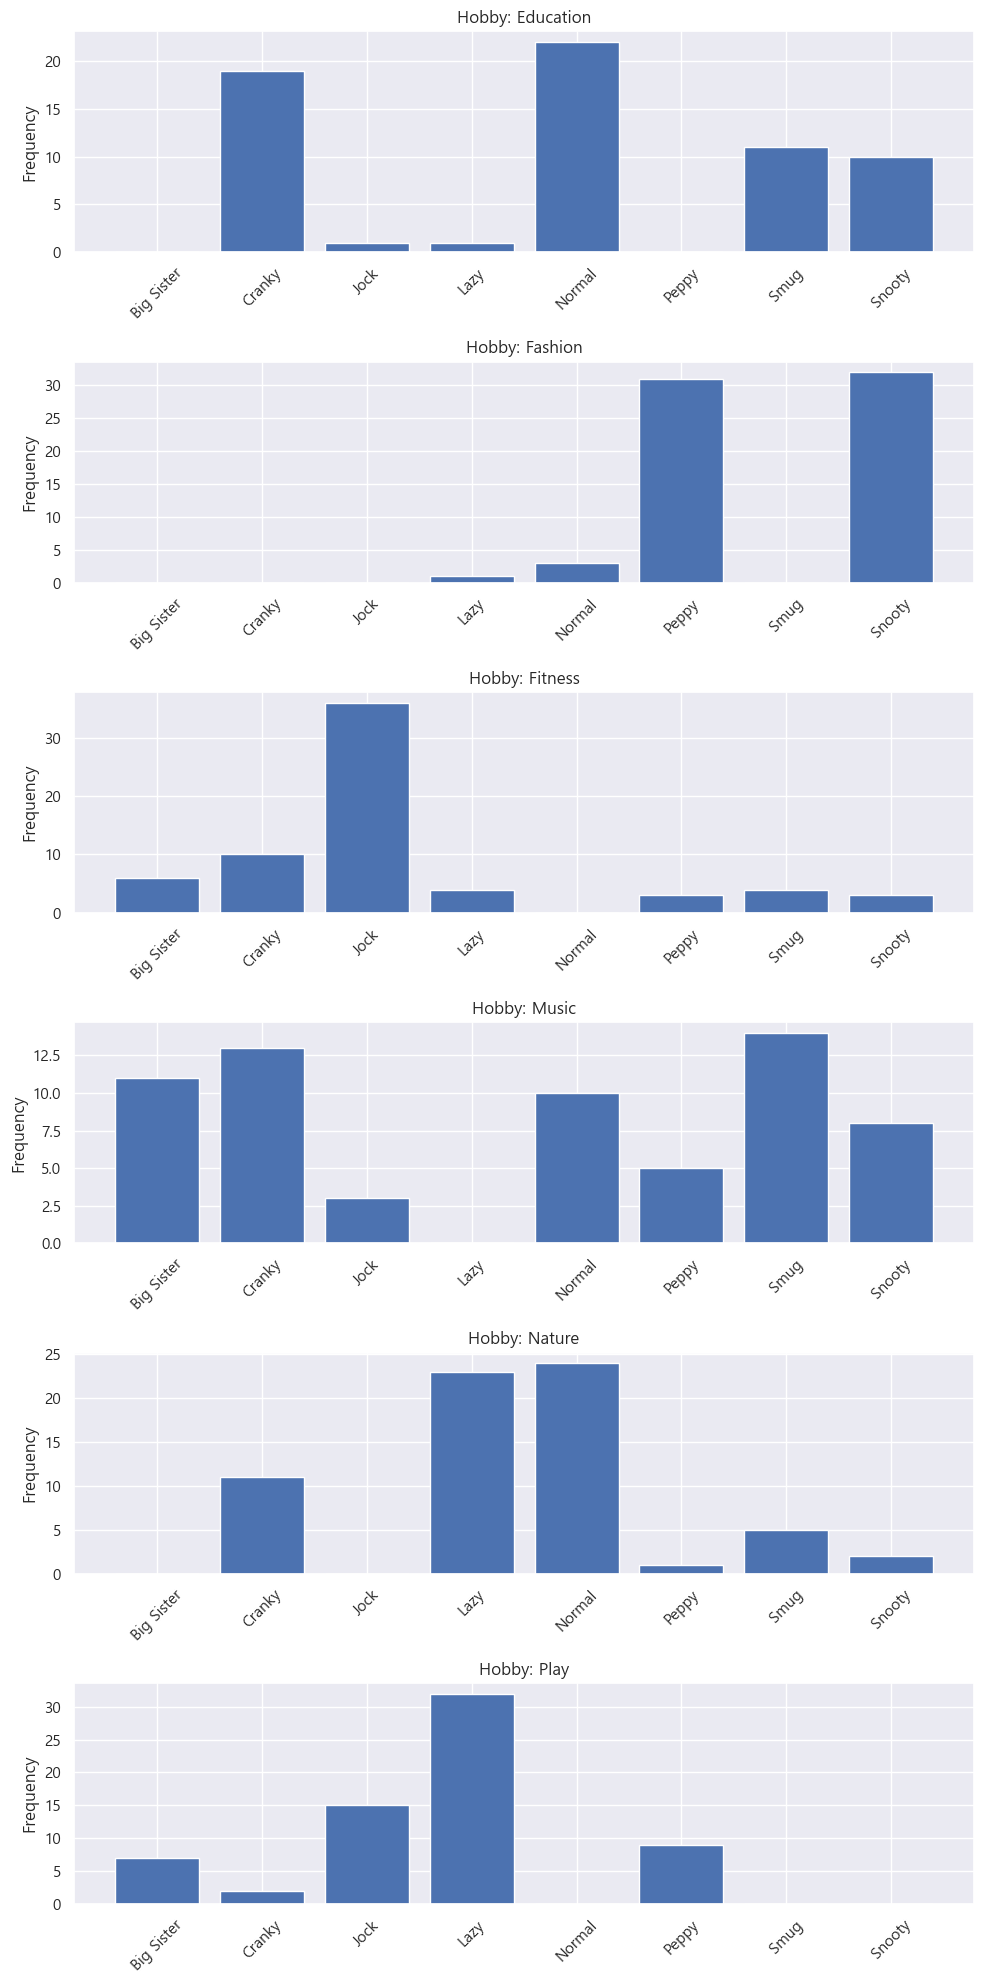

In [91]:
# 'Hobby'별로 'Personality'의 빈도수를 계산
personality_counts = df.groupby(['Hobby', 'Personality']).size().unstack(fill_value=0)

# 그래프 그리기
fig, axes = plt.subplots(nrows=len(personality_counts), ncols=1, figsize=(10, 20))

# enumerate해서 그리기
for (idx, (hobby, data)) in enumerate(personality_counts.iterrows()):
    axes[idx].bar(data.index, data.values)
    axes[idx].set_title(f'Hobby: {hobby}')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xticklabels(data.index, rotation=45)

plt.tight_layout()
plt.show()

- 생각보다 Hobby별 Personality의 분포가 고르지 않습니다.
- 아까 Personality의 분포 자체는 다 비슷했기 때문에, 지금 그린 분포 중 가장 고른 분포인 Music 분포를 골라서 Lazy 칼럼을 지우는 것으로 결정하고, lazy가 가장 많고, 분포가 제일 고르지 않은 Nature과 Fashion 칼럼을 지워보겠습니다.

- 현재 categorical 중에서도 이진 분류로 들어가 있는 것은 Exist와 Gender, Conversation Type이 세 가지인데, Exist는 이미 0과 1로 one-hot encoding 되어 있고 Gender와 Conversation Type은 아직 categorical 하기 때문에 one-hot encoding을 진행해주고 두 칼럼 중 각각 Male과 B를 지워주어 각 더미변수끼리의 선형관계를 막아보겠습니다.

In [92]:
encoding = pd.get_dummies(style1, columns=['Gender', 'Personality', 'Hobby', 'Conversation Type'], dtype=int)
rename_columns(encoding)

# 'Male'와 'Lazy', 'Nature', 'Fashion', 'B' 열 제거
# 아까 미처 제거하지 못한 Style 2와 Rank까지 제거
encoding = encoding.drop(['Male', 'Lazy', 'Nature', 'Fashion', 'B', 'Style 2', 'Rank'], axis=1)

encoding.head(3)

,Name,Korean Name,AP,Species,Sociability,순위,승률,Exist,Mention Count,Viral,Active,Cool,Cute,Elegant,Gorgeous,Female,Big Sister,Cranky,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,A
0,Admiral,일섭,0.2101,Bird,2,195.0,0.4138,1,7.0,156.519426,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Agent S,2호,0.1548,Squirrel,3,87.0,0.5954,1,32.0,217.129316,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,Agnes,아그네스,0.1961,Pig,3,237.0,0.2827,0,24.0,229.243190,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1


In [93]:
encoded = pd.get_dummies(encoding, columns=['Species'], dtype=int)
rename_columns(encoded)

# Dog, Cat, Rabbit, Hamster 열 제외 싹 제거
# 사람들 선호 종 남기고 전부 제거
encoded = encoded.drop(['Frog', 'Mouse', 'Horse', 'Bird', 'Penguin', 'Sheep', 'Elephant', 'Wolf', 
                          'Ostrich', 'Deer', 'Eagle', 'Gorilla', 'Chicken', 'Koala', 'Goat', 
                          'Kangaroo', 'Monkey', 'Anteater', 'Hippo', 'Tiger', 'Alligator', 
                          'Lion', 'Rhino', 'Cow', 'Octopus', 'Squirrel', 'Duck', 'Cub', 'Pig', 'Bear'], axis=1)

encoded.head(3)

,Name,Korean Name,AP,Sociability,순위,승률,Exist,Mention Count,Viral,Active,Cool,Cute,Elegant,Gorgeous,Female,Big Sister,Cranky,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,A,Cat,Dog,Hamster,Rabbit
0,Admiral,일섭,0.2101,2,195.0,0.4138,1,7.0,156.519426,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Agent S,2호,0.1548,3,87.0,0.5954,1,32.0,217.129316,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,Agnes,아그네스,0.1961,3,237.0,0.2827,0,24.0,229.243190,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [94]:
# 아까 미처 제거하지 못한 Gorgeous까지 제거; 비슷한 스타일 (Elegant, Cool과 겹치는듯)
encoded = encoded.drop(['Gorgeous'], axis=1)

In [95]:
print(encoded.shape)

(392, 30)


- Numerical Data에 대한 이해

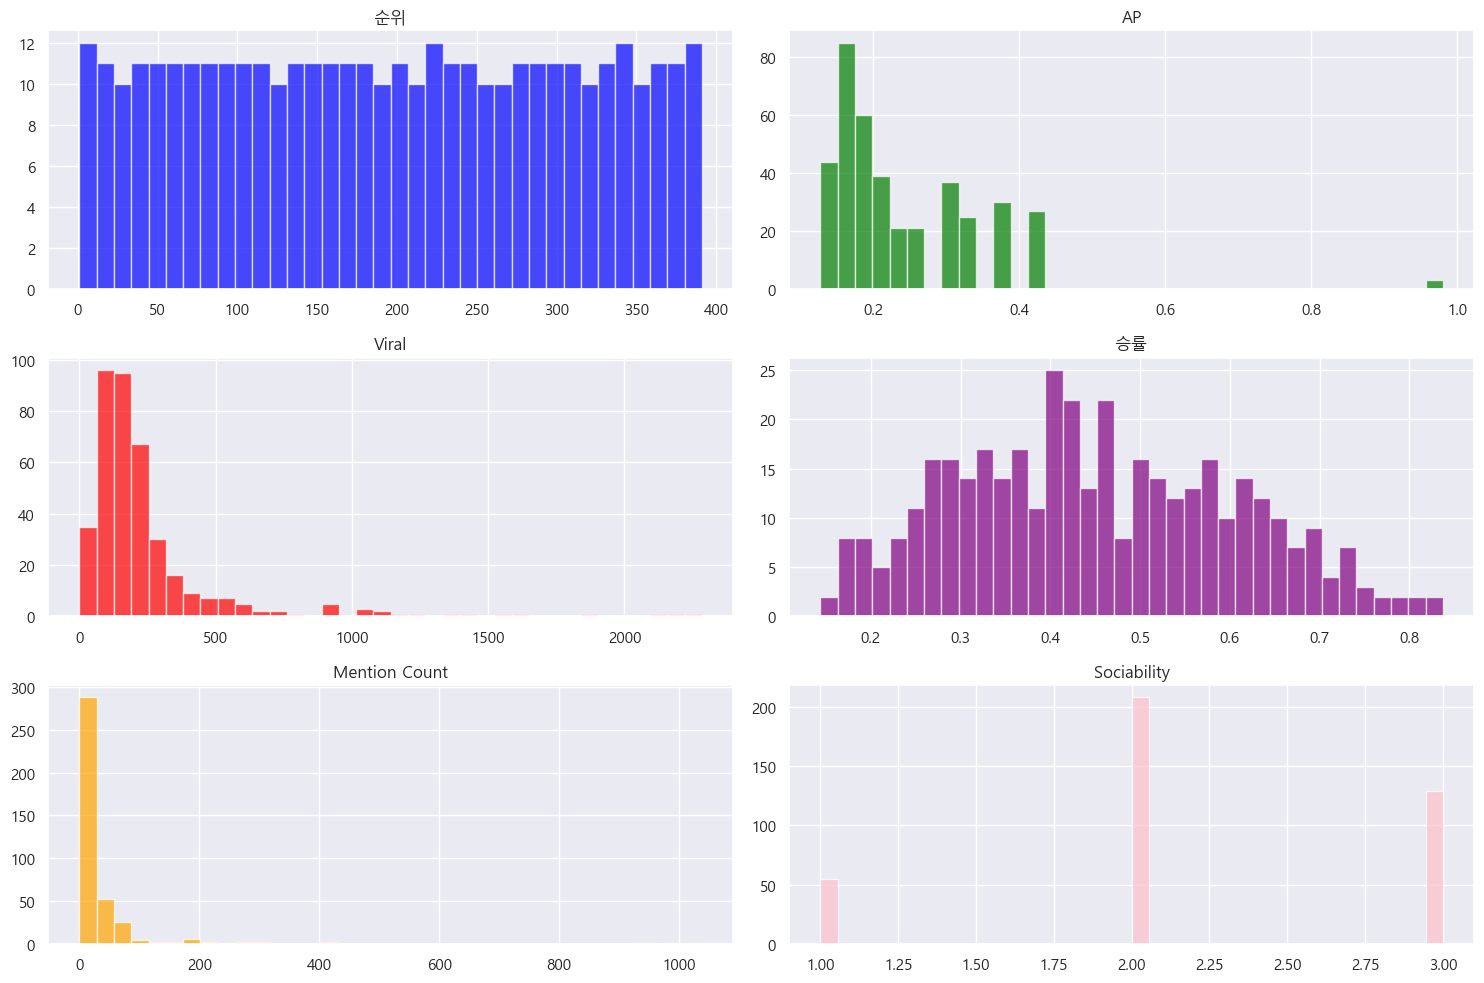

In [96]:
# 한눈에 보기 위해 서브플롯 그리기
plt.figure(figsize=(15, 10))

# 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그리드 별로 그리기
plt.subplot(3, 2, 1)  # 3x2 그리드의 첫 번째 위치
plt.hist(df['순위'], bins=36, color='blue', alpha=0.7)
plt.title('순위')

plt.subplot(3, 2, 2)  # 3x2 그리드의 두 번째 위치
plt.hist(df['AP'], bins=36, color='green', alpha=0.7)
plt.title('AP')

plt.subplot(3, 2, 3)  # 3x2 그리드의 세 번째 위치
plt.hist(df['Viral'], bins=36, color='red', alpha=0.7)
plt.title('Viral')

plt.subplot(3, 2, 4)  # 3x2 그리드의 네 번째 위치
plt.hist(df['승률'], bins=36, color='purple', alpha=0.7)
plt.title('승률')

plt.subplot(3, 2, 5)  # 3x2 그리드의 다섯 번째 위치
plt.hist(df['Mention Count'], bins=36, color='orange', alpha=0.7)
plt.title('Mention Count')

plt.subplot(3, 2, 6)  # 3x2 그리드의 다섯 번째 위치
plt.hist(df['Sociability'], bins=36, color='pink', alpha=0.7)
plt.title('Sociability')

plt.tight_layout()  # 서브플롯 간의 간격을 자동으로 조정
plt.show()

- 그림을 봤을 때, 'Viral'과 'Mention Count'의 데이터 범위가 상대적으로 넓음
- 특히 'Mention Count'의 경우에는 데이터가 한쪽으로 매우 치우쳐 있음
    - 스케일링 필수!

#### [3-4]: 설명변수와 종속변수 간의 관계 탐색
모든 변수들 간의 관계를 탐색합니다.

In [97]:
pd.options.display.max_rows = None 

In [98]:
### Pearson 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표입니다.
### -1 에서 1 사이의 값을 가진다는 특징이 있습니다.
### 1일 때는 완전 양의 상관(perfect positive correlation),
### -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보입니다.
### https://m.blog.naver.com/istech7/50153047118

#cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
cols = encoded.columns.to_list()
del cols[:2]

corr = encoded[cols].corr(method = 'pearson')
corr

,AP,Sociability,순위,승률,Exist,Mention Count,Viral,Active,Cool,Cute,Elegant,Female,Big Sister,Cranky,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,A,Cat,Dog,Hamster,Rabbit
AP,1.000000,-0.125485,0.190643,-0.243103,-0.104267,-0.035002,-0.007639,0.032650,0.033735,0.005800,0.020957,-0.088023,-0.011580,0.118124,0.035476,0.036098,-1.376279e-01,0.013246,-0.024706,0.058718,0.034725,0.051178,-0.035558,0.125912,-0.266647,-1.332230e-01,1.146062e-01,-0.241184
Sociability,-0.125485,1.000000,-0.108634,0.122186,-0.061746,0.053001,0.069257,0.363843,-0.233092,0.187084,-0.151256,0.129501,0.249933,-0.539601,0.497608,-0.120650,4.655555e-01,-0.019520,-0.305393,-0.388608,0.233329,-0.105653,0.174235,0.037796,0.060293,-3.995117e-04,-1.397696e-02,0.121029
순위,0.190643,-0.108634,1.000000,-0.867639,0.002339,-0.362737,-0.521732,0.110564,0.163223,-0.326938,0.090352,-0.148809,0.054923,0.154863,0.000689,-0.206527,-1.028249e-01,0.141538,0.058626,0.014395,0.133987,0.098492,-0.100310,-0.011198,-0.136960,-3.237998e-02,-1.449110e-01,-0.142963
승률,-0.243103,0.122186,-0.867639,1.000000,0.043364,0.426325,0.560428,-0.152312,-0.205324,0.394589,-0.053317,0.250468,-0.094202,-0.210032,-0.066406,0.255430,1.779458e-01,-0.126357,-0.007194,-0.016247,-0.193369,-0.073614,0.074050,-0.024092,0.163485,5.202879e-02,1.091738e-01,0.171552
Exist,-0.104267,-0.061746,0.002339,0.043364,1.000000,-0.202971,-0.203952,-0.039921,-0.108853,0.073565,-0.089139,0.058123,-0.315218,0.108959,0.077084,0.093826,1.338924e-01,-0.404972,0.077084,0.053790,0.106564,-0.155868,-0.031284,-0.698460,0.095171,5.309382e-02,-2.173067e-01,0.035117
Mention Count,-0.035002,0.053001,-0.362737,0.426325,-0.202971,1.000000,0.868471,-0.061101,-0.015187,0.104387,0.094006,0.029711,0.014259,-0.091650,-0.031853,0.056690,1.333619e-02,0.112735,-0.038179,-0.059997,-0.053427,0.078139,-0.004260,0.104729,0.151190,-3.175276e-02,2.402810e-01,0.019629
Viral,-0.007639,0.069257,-0.521732,0.560428,-0.203952,0.868471,1.000000,-0.068415,-0.077153,0.206114,-0.006108,0.067221,0.043377,-0.105773,-0.049455,0.088633,5.598927e-02,0.046495,-0.077837,-0.049337,-0.056060,0.068451,0.011076,0.113322,0.138798,-2.028645e-02,2.210765e-01,0.052154
Active,0.032650,0.363843,0.110564,-0.152312,-0.039921,-0.061101,-0.068415,1.000000,-0.109712,-0.187648,-0.299173,-0.268616,0.087839,-0.031753,0.562467,-0.228601,-2.463240e-02,-0.090182,-0.188127,-0.181123,0.437782,-0.048879,0.122930,-0.020070,-0.020044,-8.458387e-02,-3.997828e-02,-0.008614
Cool,0.033735,-0.233092,0.163223,-0.205324,-0.108853,-0.015187,-0.077153,-0.109712,1.000000,-0.367165,-0.170358,-0.204252,0.149351,0.502046,-0.168659,-0.195640,-1.629725e-01,0.158217,-0.040226,0.003558,0.034667,0.218105,-0.120716,0.062149,-0.009522,2.044750e-02,4.935971e-02,-0.083719
Cute,0.005800,0.187084,-0.326938,0.394589,0.073565,0.104387,0.206114,-0.187648,-0.367165,1.000000,-0.134135,0.479955,-0.032177,-0.235657,-0.222220,0.393959,4.709405e-01,-0.179768,-0.141600,0.020098,-0.225055,-0.043031,-0.021670,-0.028678,0.013221,2.117837e-02,-1.818641e-02,0.109916


### [Correlation: 상관관계] 를 직관적으로 살펴보기 위해 Heatmap 으로 돌려봅니다.
* heatmap : seaborn 시각화 라이브러리를 사용해서 표현합니다.
* 시각화의 대표적인 라이브러리가 matplot(https://matplotlib.org/)과 seaborn(https://seaborn.pydata.org/)이 있습니다. 그 중 seaborn 사용!
* [HeatMap]
    * Reference
        * https://seaborn.pydata.org/generated/seaborn.heatmap.html
        * https://www.delftstack.com/ko/howto/seaborn/correlation-heatplot-seaborn-python/
        * https://dsbook.tistory.com/51
* [Parameters]
    * corr()함수
        DataFrame의 상관 행렬을 반환하는 데 사용됩니다.
        색상 축 막대의 각 값에 대한 색상 음영을 확인합니다.
    * annot
        상관 값을 표시하는 데 사용됩니다. 즉, annot를 이용해, 각 셀(cell)의 값을 표기할 수 있습니다.
        주석의 크기를 늘리려면 heatmap()함수에서
        annot매개 변수를 True로 설정해야합니다.
    * annot_kws = {'size':15} 처럼, annot_kws매개 변수에서 글꼴 크기를 키-값 쌍으로 지정합니다.
    * fmt
        * 각 셀(cell) 값의 데이터 유형을 지정해 줍니다.
        * fmt="d": 정수형 (int)
        * fmt=".2f": 실수형 (float), 소수점 2번째 자리까지
    * cmap
        * 히트맵의 색상을 표시합니다.
        * yticklabels = cols, xticklabels = cols
        * x축, y축 레이블을 표시합니다.

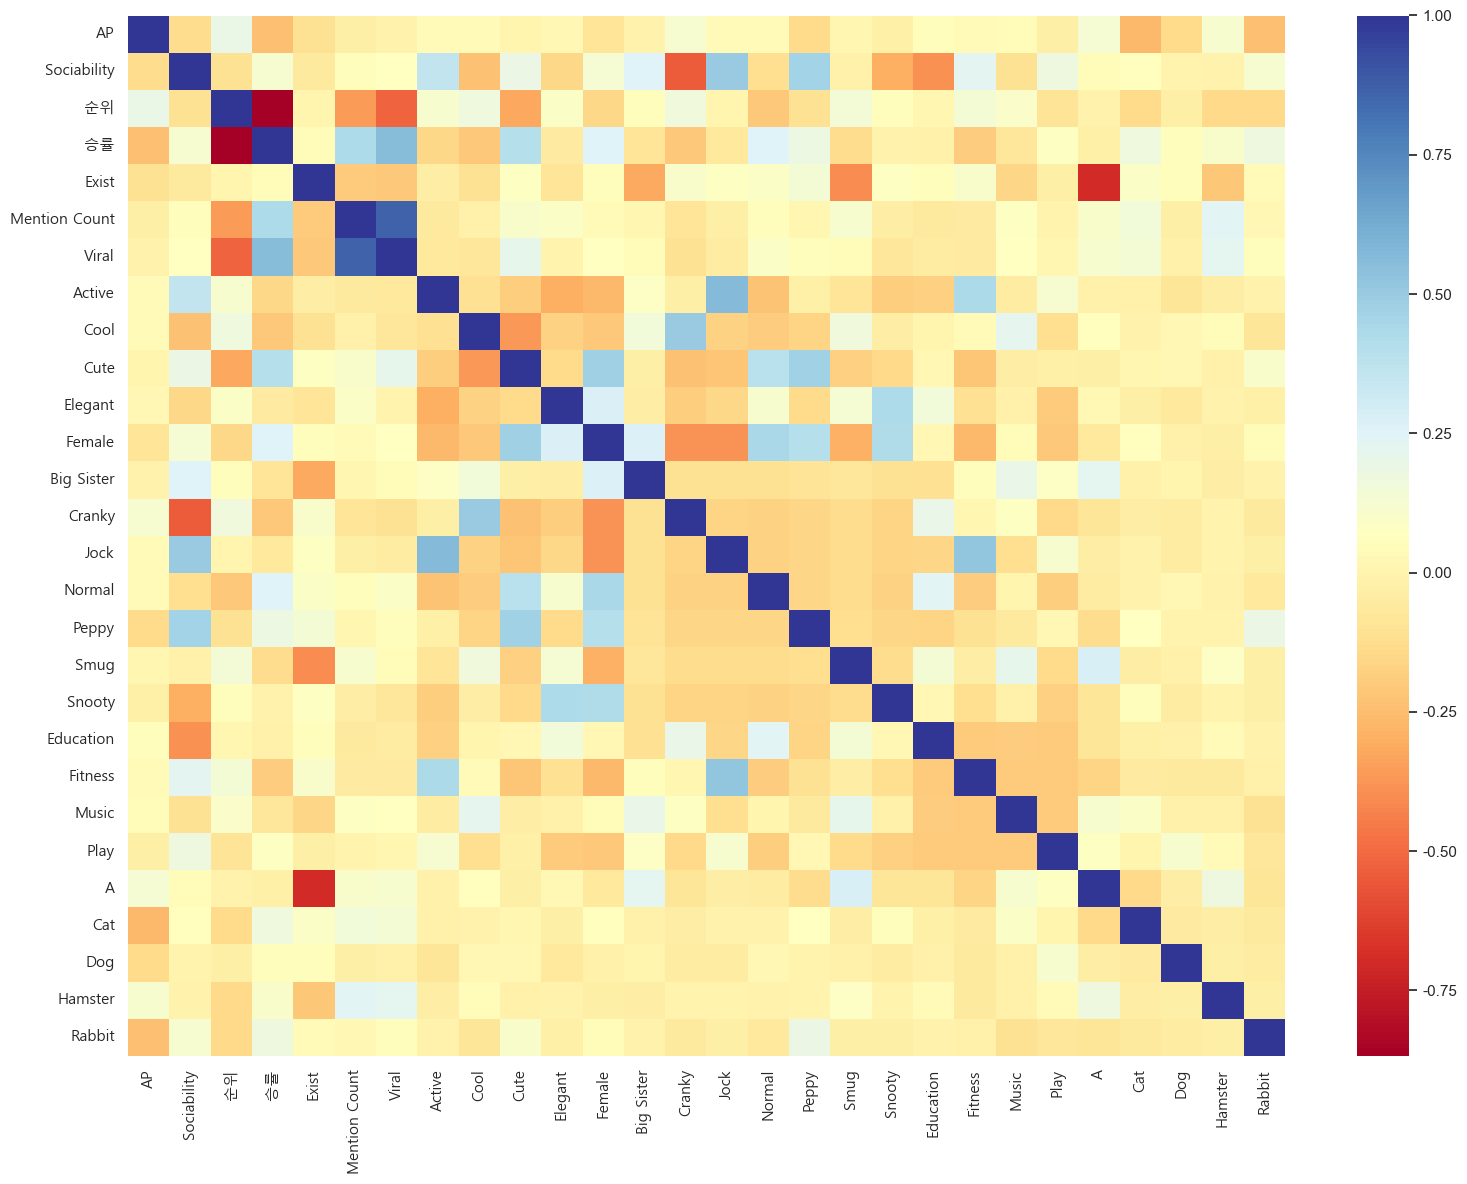

In [99]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.0)  # heatmap 안의 font-size 설정, font_scale = 1.5
heatmap = sns.heatmap(corr.values, annot = False, annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")

# 제 노트북 상에서는 계속 heatmap의 글자가 나오지 않아 False로 해두겠습니다.

# 여백 조정
# plt.subplots_adjust(top=0.93, bottom=0.07, left=0.07, right=0.93, hspace=0.2, wspace=0.2)


# 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.tight_layout() ## 여백을 조정합니다. 
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.show() ## 화면에 출력합니다.

##### [3-4-1] 설명변수(x) 와 종속변수(y) 간의 관계 탐색 (1) CMEDV - 주택 가격~ 방 갯수("RM")의 관계

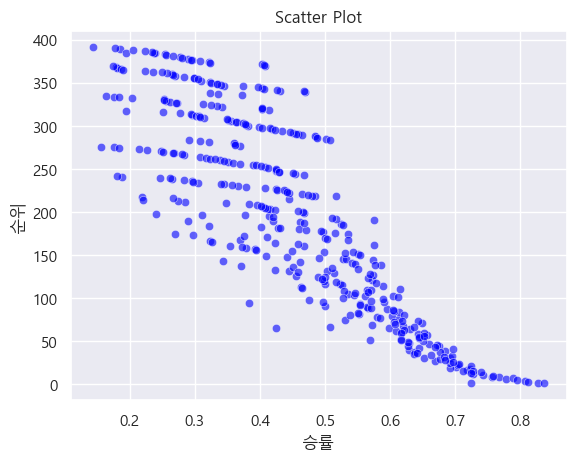

In [100]:
### scatter plot 산점도를 의미합니다.
### https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=encoded, x='승률', y='순위', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [101]:
### 해설) 순위와 승률이 음의 상관관계(negative correlation)를 갖고 있습니다. 

----------------------------------------------------------------------------------------------------------------
0. 문제정의 (Problem Define)
1. 라이브러리 불러오기 (Libraries Setting)
2. 데이터 수집하기 (Data Collection)
3. 데이터 탐색하기 (Data Exploration) 

    * 3-1. 데이터셋 기본 정보 파악
    * 3-2. 종속 변수 (목표 변수) 탐색
    * 3-3. 설명 변수 (독립변수/특징변수/속성)탐색
    * 3-4. 변수들 간의 관계 탐색

            [3-4-1] 설명변수(x) 와 종속변수(y) 간의 관계 탐색(1) CMEDV - 주택 가격~ 방 갯수("RM")의 관계
            [3-4-2] 설명변수(x) 와 종속변수(y) 간의 관계 탐색(2) CMEDV - 빈곤층의 비율(“LSTAT”)의 관계
            [3-4-3] 도시별 차이 탐색 
        
4. 모델링 하기 (Modeling)
    * 4-1. 데이터 전처리
    * 4-2. 회귀 모델링
    * 4-3. 모델 해석
    * 4-4. 모델 예측 결과 및 성능 평가
----------------------------------------------------------------------------------------------------------------

#### [4]: 모델링 하기 (Modeling)
이제 주어진 가공된 독립변수들을 활용하여 매사추세츠주 각 지역의 주택 가격을 예측하는 회귀 모델을 만들어 보겠습니다.

In [102]:
# 높은 상관관계를 보였던 Cranky, A, 승률, Sociability, Big Sister, Viral, Dog, Female 제거

encoded = encoded.drop(['Cranky', 'A', '승률', 'Sociability', 'Big Sister', 'Viral', 'Female', 'Dog'], axis=1)

In [103]:
encoded.head()

,Name,Korean Name,AP,순위,Exist,Mention Count,Active,Cool,Cute,Elegant,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,Cat,Hamster,Rabbit
0,Admiral,일섭,0.2101,195.0,1,7.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agent S,2호,0.1548,87.0,1,32.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Agnes,아그네스,0.1961,237.0,0,24.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,Al,우락,0.2941,368.0,1,8.0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Alfonso,알베르트,0.3676,174.0,1,19.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           392 non-null    object 
 1   Korean Name    392 non-null    object 
 2   AP             392 non-null    float64
 3   순위             392 non-null    float64
 4   Exist          392 non-null    int64  
 5   Mention Count  392 non-null    float64
 6   Active         392 non-null    int32  
 7   Cool           392 non-null    int32  
 8   Cute           392 non-null    int32  
 9   Elegant        392 non-null    int32  
 10  Jock           392 non-null    int32  
 11  Normal         392 non-null    int32  
 12  Peppy          392 non-null    int32  
 13  Smug           392 non-null    int32  
 14  Snooty         392 non-null    int32  
 15  Education      392 non-null    int32  
 16  Fitness        392 non-null    int32  
 17  Music          392 non-null    int32  
 18  Play      

#### [4-1]: 데이터 전처리
먼저 특징(Feature)들의 범주(scale) 차이를 없애기 위해 수치형 변수(특징, 속성, 독립변수)에 대해서 표준화를 진행합니다.
##### [Scaler]
* https://m.blog.naver.com/demian7607/222009975984

In [130]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# '순위' 열에 MinMaxScaler 적용, 인기 점수화 시킴
encoded['순위_scaled'] = scaler.fit_transform(encoded[['순위']])
encoded['순위_scaled'] = 1 - encoded['순위_scaled']

# 'AP' 열에 로그 변환 적용
encoded['AP_log'] = np.log1p(encoded['AP'])

# # 'Viral' 열에 로그 변환 적용
# encoded['Viral_log'] = np.log1p(encoded['Viral'])

# 'Mention Count' 열에 로그 변환 적용
encoded['MC_log'] = np.log1p(encoded['Mention Count'])


In [131]:
encoded.head() # Original Table

,Name,Korean Name,AP,순위,Exist,Mention Count,Active,Cool,Cute,Elegant,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,Cat,Hamster,Rabbit,순위_scaled,AP_log,MC_log
0,Admiral,일섭,0.2101,195.0,1,7.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.502564,0.190703,2.079442
1,Agent S,2호,0.1548,87.0,1,32.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.779487,0.143927,3.496508
2,Agnes,아그네스,0.1961,237.0,0,24.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.394872,0.179066,3.218876
3,Al,우락,0.2941,368.0,1,8.0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.058974,0.257815,2.197225
4,Alfonso,알베르트,0.3676,174.0,1,19.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.556410,0.313057,2.995732


In [107]:
scaled_df_col = encoded.columns.tolist()
print(scaled_df_col)

['Name', 'Korean Name', 'AP', '순위', 'Exist', 'Mention Count', 'Active', 'Cool', 'Cute', 'Elegant', 'Jock', 'Normal', 'Peppy', 'Smug', 'Snooty', 'Education', 'Fitness', 'Music', 'Play', 'Cat', 'Hamster', 'Rabbit', '순위_scaled', 'AP_log', 'MC_log']


In [108]:
# 전부 사용 버전

for del_col in ['Name', 'Korean Name', 'AP', '순위', '순위_scaled', 'Mention Count']:
    scaled_df_col.remove(del_col)
    
print(scaled_df_col)

['Exist', 'Active', 'Cool', 'Cute', 'Elegant', 'Jock', 'Normal', 'Peppy', 'Smug', 'Snooty', 'Education', 'Fitness', 'Music', 'Play', 'Cat', 'Hamster', 'Rabbit', 'AP_log', 'MC_log']


#### [Numerical Variables vs. Categorical Variables]

In [132]:
# 전부 사용 버전
encoded[scaled_df_col].head()

,Exist,Active,Cool,Cute,Elegant,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,Cat,Hamster,Rabbit,AP_log,MC_log
0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.190703,2.079442
1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.143927,3.496508
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.179066,3.218876
3,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.257815,2.197225
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.313057,2.995732


#### [Data Setting] training/test set 나누기
* 학습 후 도출될 예측 모델의 예측 성능을 평가하기 위해, 먼저 전체 데이터셋을 "Training set"과 "Test set"으로 나눕니다.
* Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 검증합니다.

In [133]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = encoded[scaled_df_col]
y = encoded['순위_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train.shape, y_train.shape

((313, 19), (313,))

In [135]:
X_test.shape, y_test.shape

((79, 19), (79,))

In [136]:
pd.options.display.max_rows = 60 # default

In [137]:
y_train
### 순위_scaled 값을 의미합니다.

258    0.264103
182    0.641026
172    0.510256
63     0.723077
340    0.530769
         ...   
71     0.235897
106    0.866667
270    0.700000
348    0.858974
102    0.479487
Name: 순위_scaled, Length: 313, dtype: float64

In [138]:
X_train.head()

,Exist,Active,Cool,Cute,Elegant,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,Cat,Hamster,Rabbit,AP_log,MC_log
258,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.219216,1.386294
182,1,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.190703,3.258097
172,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.125487,2.639057
63,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.159565,3.218876
340,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.236968,3.828641


#### [다중공산성 1] VIF: Variance Inflation Factor
* 회귀 분석에서 하나의 독립 변수가 다른 독립 변수와의 상관 관계가 높으면(다중공선성이 존재하면) 회귀 분석 모델링 결과에 부정적인 영향을 미칠 수 있기 때문에, 모델링을 진행하기 앞서 다중공선성의 존재여부를 확인해야합니다.

* 보통 다중공선성을 판단할 때 VIF(Variance Inflation Factors)값을 확인합니다.

* 일반적으로 VIF>10인 독립변수들은 다른 변수와의 상관관계가 높음을 의미합니다.
* 다중공선성이 존재함을 의미합니다. 해당 변수는 모델링에서 고려하지 않는 것이 좋습니다.

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 

,features,VIF Factor
0,Exist,3.7
1,Active,2.3
2,Cool,2.0
3,Cute,3.3
4,Elegant,2.0
5,Jock,2.6
6,Normal,2.5
7,Peppy,2.3
8,Smug,1.5
9,Snooty,1.8


In [117]:
### 해설) 모든 변수의 VIF(다중공선성) 이 10이하입니다. 다중공선성이 존재하지 않으므로, 모든 변수들 모델링 시 고려합니다.

#### [참고: 다중공산성 2]
* https://bkshin.tistory.com/entry/DATA-20-%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC-VIF

* 다중공산성이 10보다 큰 것을 없애는 방법:

    * 산점도를 찍어보고, 밀접히 연관된 것 중 한 개를 독립변수에서 제외합니다.
    * VIF가 10보다 큰 것들 모두를 독립변수에서 제외합니다.
    * 좋은 회귀모델 성능을 만들기 위해서는 VIF가 10보다 큰 변수를 하지 않는 것이 좋습니다.

* VIF가 10보다 크면, 변수들끼리 영향을 주어서 결과에 부정적인 영향을 미칠 수 있습니다.

#### [4-2]: 회귀모델링
1.  먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.
2.  도출된 모델을 Test set에 적용해 주택 가격(“CMEDV”)을 예측합니다. 
3.  실제 “CMEDV” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다.

In [140]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()       # Ridge, Lasso 도 있음
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

#### [4-3]: 모델해석하기
각 설명변수 (특징변수, 속성, 독립변수, x, 열) 에 대한 회귀계수를 확인합니다.

In [141]:
### print coef 
### 계수를 출력합니다.
print(lr.coef_)

[ 0.01585318 -0.02998955  0.01930581  0.07032772 -0.03646215  0.06418161
  0.12008291 -0.01518069 -0.05530036  0.03890858 -0.0204019  -0.0495616
 -0.07074672  0.02473765  0.01009671  0.20446228  0.03776876 -0.63724846
  0.15107374]


In [142]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)
coefs = pd.DataFrame(zip(encoded[scaled_df_col].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

### https://m.blog.naver.com/tkdldjs35/221578915290 : zip

,feature,coefficients
0,Exist,0.015853
1,Active,-0.029990
2,Cool,0.019306
3,Cute,0.070328
4,Elegant,-0.036462
5,Jock,0.064182
6,Normal,0.120083
7,Peppy,-0.015181
8,Smug,-0.055300
9,Snooty,0.038909


In [143]:
### 크기 순서대로 나열합니다. 
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다. 
### 절대값 기준 함수: coefficients.abs().sort_values 

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
17,AP_log,-0.637248
15,Hamster,0.204462
18,MC_log,0.151074
6,Normal,0.120083
12,Music,-0.070747
3,Cute,0.070328
5,Jock,0.064182
8,Smug,-0.055300
11,Fitness,-0.049562
9,Snooty,0.038909


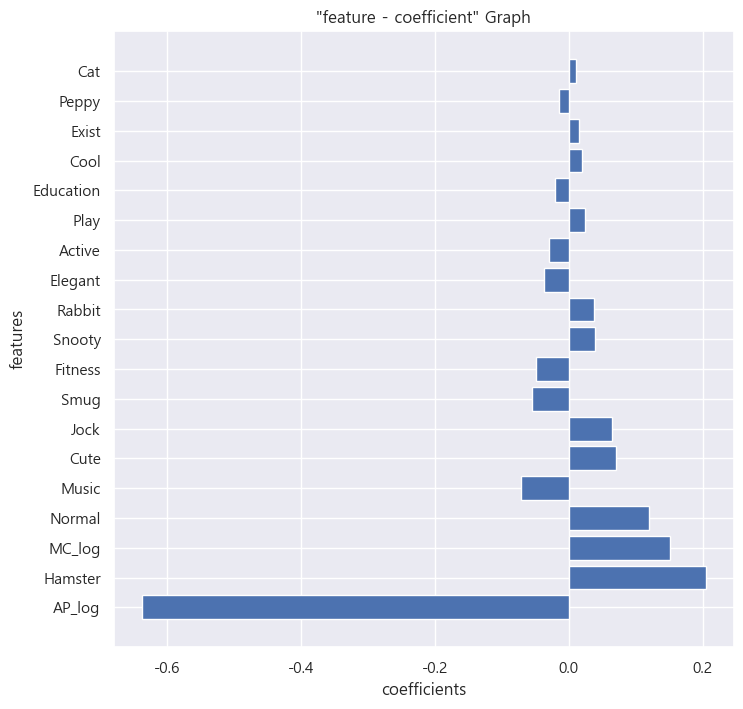

In [144]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그립니다.
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

#### [4-3] : 모델 해석
 [4-3-1: 유의성 검정] 을 합니다. 통계에서 변수가 유의하다는 의미입니다.

In [145]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 
# 최소의 square?
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              순위_scaled   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     15.65
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.37e-34
Time:                        07:20:42   Log-Likelihood:                 53.239
No. Observations:                 313   AIC:                            -66.48
Df Residuals:                     293   BIC:                             8.445
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1680      0.069      2.438      0.015       0.032       0.304
Exist          0.0159      0.032      0.496      0.621      -0.047       0.079
Active        -0.0300      0.036     -0.841      0.401      -0.100       0.040
Cool           0.0193      0.030      0.650      0.516      -0.039       0.078
Cute           0.0703      0.034      2.092      0.037       0.004       0.136
Elegant       -0.0365      0.032     -1.128      0.260      -0.100       0.027
Jock           0.0642      0.051      1.260      0.209      -0.036       0.164
Normal         0.1201      0.047      2.529      0.012       0.027       0.214
Peppy         -0.0152      0.051     -0.297      0.766      -0.116       0.085
Smug          -0.0553      0.052     -1.071      0.285      -0.157       0.046
Snooty         0.0389      0.046      0.851      0.395      -0.051       0.129
Education     -0.0204      0.039     -0.527      0.598      -0.097       0.056
Fitness       -0.0496      0.046     -1.072      0.285      -0.141       0.041
Music         -0.0707      0.040     -1.786      0.075      -0.149       0.007
Play           0.0247      0.041      0.600      0.549      -0.056       0.106
Cat            0.0101      0.054      0.188      0.851      -0.095       0.116
Hamster        0.2045      0.085      2.406      0.017       0.037       0.372
Rabbit         0.0378      0.061      0.618      0.537      -0.082       0.158
AP_log        -0.6372      0.163     -3.919      0.000      -0.957      -0.317
MC_log         0.1511      0.012     12.273      0.000       0.127       0.175
==============================================================================
Omnibus:                        4.997   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.451
Skew:                          -0.221   Prob(JB):                        0.108
Kurtosis:                       2.617   Cond. No.                         48.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
X_train2

,const,Exist,Active,Cool,Cute,Elegant,Jock,Normal,Peppy,Smug,Snooty,Education,Fitness,Music,Play,Cat,Hamster,Rabbit,AP_log,MC_log
258,1.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.219216,1.386294
182,1.0,1,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.190703,3.258097
172,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.125487,2.639057
63,1.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.159565,3.218876
340,1.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.236968,3.828641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0.313057,1.945910
106,1.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0.159565,3.258097
270,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.143927,2.397895
348,1.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.143927,4.382027


##### [4-3-2: 해설] coefficient, p-value
* coeff를 봐야 합니다.
* P>|t|를 봐야 합니다. p-value를 의미합니다. 0.05 보다 작아야 유의합니다.


##### [4-3-2: 해설] R-Squared(결정계수)에 대해서 알아보기
* 결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도입니다.
* 종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킵니다.
* 결정계수의 통상적인 기호는 R²(R-sqaured)입니다.
* 일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 늘어갈수록 증가하기 때문에 해석에 주의해야 합니다.
* 결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워집니다.
* 즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있습니다.

##### [4-3-3: 해설] 모델에 적용해 보기
* 유의하지 않은 값들 빼고 보겠습니다. (p value > 0.05)
- **[Positive]** 변수 설명 : 인기도에 Positive한 영향을 미칩니다. 즉, 다른 변수의 값이 고정했을 때, 해당 변수의 값이 클수록 인기도도 높을 것입니다.
    * Cute
    * Normal
    * MC_log
    * Hamster
- **[Negative]** 변수 설명 : 인기도에 Negative한 영향을 미칩니다. 즉, 다른 변수의 값이 고정했을 때, 해당 변수의 값이 작을수록 인기도가 높을 것입니다.
    * AP_log

#### [4-4] : 모델 해설모델 에측 결과 및 성능 평가
##### [4-4-1] : 모델의 가시화(시각화)
* 예측 결과를 시각화합니다.
* 학습한 모델을 Test set에 적용하여 y값(“순위_scaled”)을 예측합니다.
* 예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화합니다.

In [125]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0.025641,0.215315
1,0.028205,0.034881
2,0.048718,0.041150
3,0.053846,0.214463
4,0.071795,0.178132


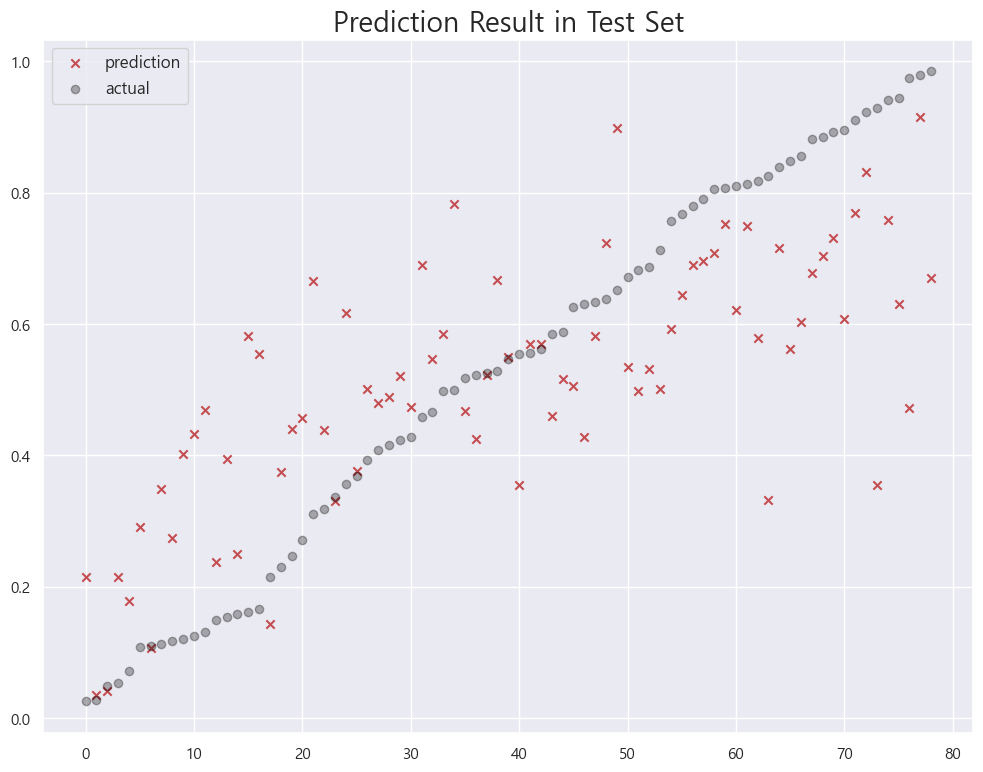

In [126]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [127]:
### R squared
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.5036642860949574
0.5115599866447705


In [128]:
### RMSE(Root Mean Squared Eror)
from sklearn.metrics import mean_squared_error
from math import sqrt

### training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

### test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.20412299596281586
0.20449514066638083


In [147]:
### 해설) Test set에서 해당 예측 모델의 R squared가 0.50이고, RMSE가 0.20입니다.